In [2]:
import re
import collections

from urllib.request import urlopen
html = urlopen("https://stepik.org/media/attachments/lesson/209719/2.html").read().decode('utf-8')
s = str(html)
regex = '<code>(.*?)</code>'
# Список всех совпадений
results = re.findall(regex, s)

c = collections.Counter()
for word in results:
    c[word] += 1

most_common_words = c.most_common(3)

final_res = dict(most_common_words)

print(final_res)

print("Наиболее встречающиеся строки: ")
for i in (sorted(final_res.keys())):
    print (i, end=' ')

{'else': 4, 'except': 4, 'finally': 4}
Наиболее встречающиеся строки: 
else except finally 

In [1]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

resp = urlopen('https://stepik.org/media/attachments/lesson/245130/6.html') # скачиваем файл
html = resp.read().decode('utf8') # считываем содержимое
soup = BeautifulSoup(html, 'html.parser') # делаем суп
table = soup.find('table', attrs = {'class' : 'wikitable sortable'})
cnt = 0
for tr in soup.find_all('tr'):
    cnt += 1
    for td in tr.find_all(['td', 'th']):
        cnt *= 2
print(cnt)

94596065609609271052308


In [2]:
import requests
from bs4 import BeautifulSoup

page = requests.get("https://stepik.org/media/attachments/lesson/209723/3.html")
soup = BeautifulSoup(page.content, 'html.parser')

table_numbers_cells = soup.find_all('td')
sum = 0

for i in table_numbers_cells:
    num_value = i.get_text()
    sum = sum + int(num_value)

print("Сумма равна: " + str(sum))

Сумма равна: 1005425


In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Начальная настройка рабочей среды. Запустите эту ячейку перед началом работы!
from plotutils import * # Функции для рисования поверхностей и контурных графиков
%matplotlib inline
#%matplotlib
from matplotlib import rcParams
rcParams.update({'font.size': 16})  # Крупнее шрифт для графиков
#rcParams.update({'font.family': 'Arial'}) # Если нет русского языка на графиках
import sympy as sp # Пакет символьной математики
sp.init_printing() # Включить отображение выражений sympy в виде математических формул
import scipy.optimize as so
%precision 4
1;


In [18]:
f = lambda x, y: x**2 + y**2
F = lambda X: f(X[0], X[1])
plotSurface(f)
plt.gcf().set_size_inches(10, 10)
#plt.savefig('parab2_surface.png', dpi=150)

NameError: name 'plotSurface' is not defined

NameError: name 'cm' is not defined

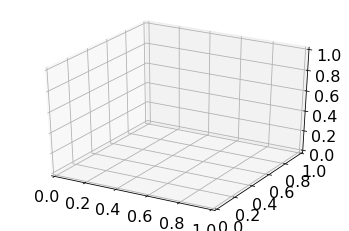

In [19]:
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')

(x, y) = np.meshgrid(np.linspace(-1.8, 1.8, 41), 
                     np.linspace(-1.8, 1.8, 41))
z = np.exp(-np.sqrt(x**2+y**2))*np.cos(4*x)*np.cos(4*y)

ax.plot_surface(x, y, z, cmap=cm.hot)
ax.set(xlabel='x', ylabel='y', zlabel='z', 
       title='Rectilinear Grid')

fig.tight_layout()

In [12]:
f = lambda x, y: x**2 + y**2
F = lambda X: f(X[0], X[1])
plotSurface = Axes3D.plotSurface(f)
#plt.gcf().set_size_inches(10, 10)
plt.savefig('parab2_surface.png', dpi=150)

AttributeError: type object 'Axes3D' has no attribute 'plotSurface'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'font.size': 14})

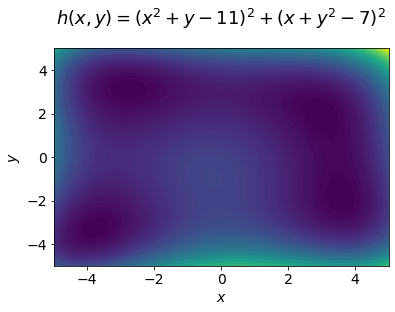

In [6]:
# Задаем функцию:
h = lambda x, y : (x**2 + y - 11)**2 + (x + y**2 -7)**2


# Диапазон изменения x
xh = np.linspace(-5, 5, 101)
yh = xh

# Координаты узлов сетки:
X, Y = np.meshgrid(xh, yh)


# График
plt.contourf(X,Y,h(X, Y), 100)
plt.contour(X,Y,h(X,Y), 20)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title(r'$h(x, y) = (x^2+y-11)^2 + (x+y^2-7)^2 $', fontsize=18, y=1.08);

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [9]:
Axes3D.plot(xs, ys, *args, **kwargs)

NameError: name 'xs' is not defined

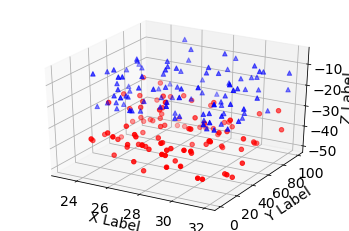

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

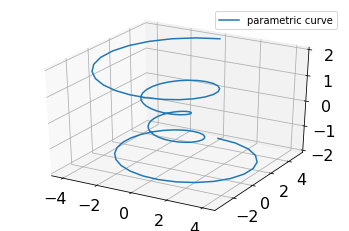

In [23]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

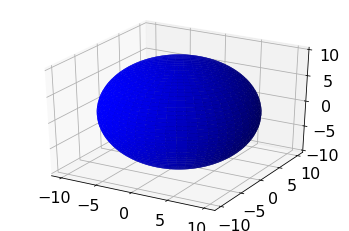

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()


In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [31]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib

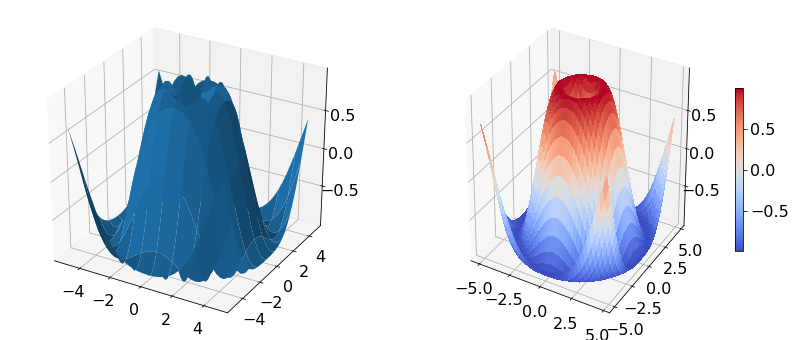

In [32]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)